## CUSTOMER CHURN PREDICTION : A PREDICTIVE INSIGHTS FOR CUSTOMER RETENTION

In [10]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

**Loading the data set**

##### **Dataset Information:** A telco dataset containing customer data and showing customer left last month.

In [11]:
base_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [12]:
base_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [13]:
base_df.shape

(7043, 21)

In [14]:
# Getting the column names
base_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
# Checking the data types for columns
base_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
# Checking the stats of numeric variables
base_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**->** 75% customers have tenure less than 55 months.

**->**  Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month.

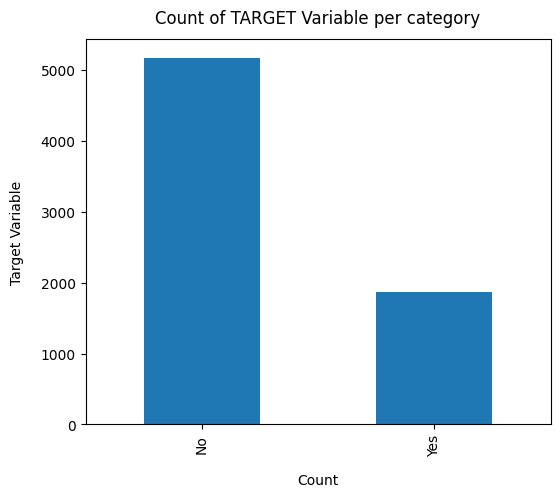

In [17]:
base_df['Churn'].value_counts().plot(kind='bar', figsize=(6, 5))
plt.xlabel("Count", labelpad=12)
plt.ylabel("Target Variable", labelpad=12)
plt.title("Count of TARGET Variable per category", y=1.02);

In [18]:
100*base_df['Churn'].value_counts()/len(base_df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [19]:
base_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

**->** Data is highly imbalanced, ratio = 73:27.

**->** So we analyse the data with other features while taking the target values separately to get some insights.

In [20]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
base_df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


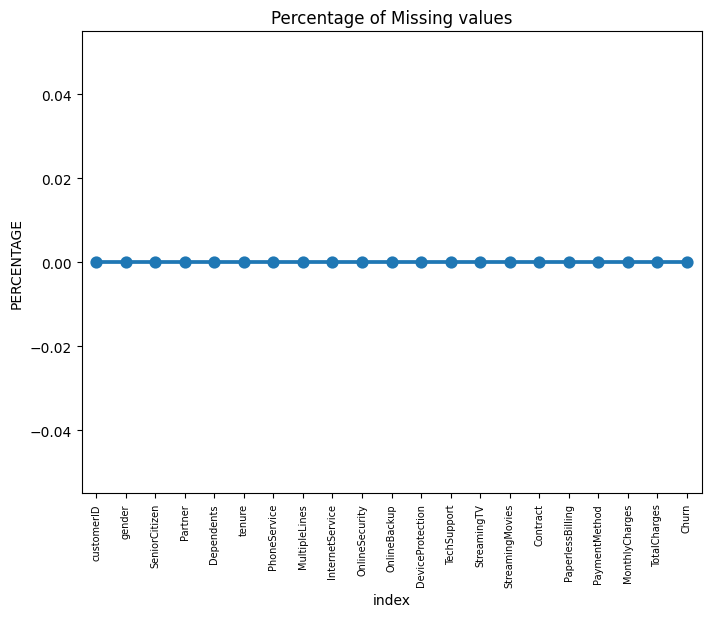

In [21]:
missing = pd.DataFrame((base_df.isnull().sum())*100/base_df.shape[0]).reset_index()
plt.figure(figsize=(8,6))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

##### Here we don't have any missing datas.

### Data Cleaning


##### Create a copy of base data for manupulation & processing

In [22]:
copy_df = base_df.copy()

##### Total Charges should be numeric amount. Let's convert it to numerical data type

In [23]:
copy_df.TotalCharges = pd.to_numeric(copy_df.TotalCharges, errors='coerce')
copy_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [24]:
# Let's see 11 missing values in Total Charges column.
copy_df.loc[copy_df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


##### Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [25]:
#Removing missing values 
copy_df.dropna(how = 'any', inplace = True)

##### Dividing customers into bins based on tenure(months)

In [26]:
# Get the max tenure in months
print(copy_df['tenure'].max())

72


In [27]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

copy_df['tenure_group'] = pd.cut(copy_df.tenure, range(1, 80, 12), right=False, labels=labels)

In [28]:
copy_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [29]:
#drop column customerID and tenure, since they are not required for processing.
copy_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
copy_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Exploration

#### Univariate Analysis

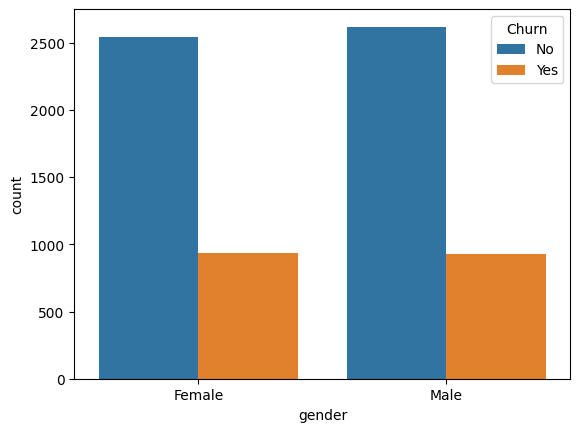

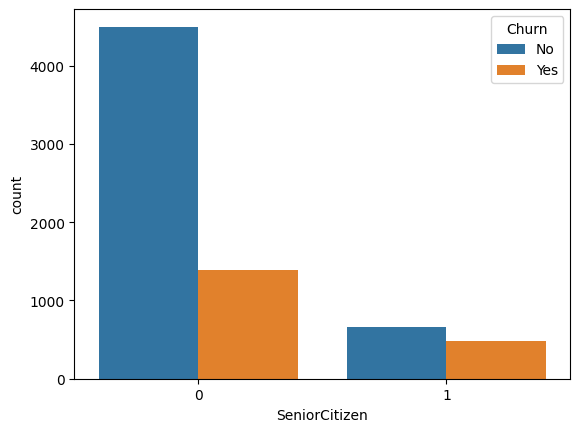

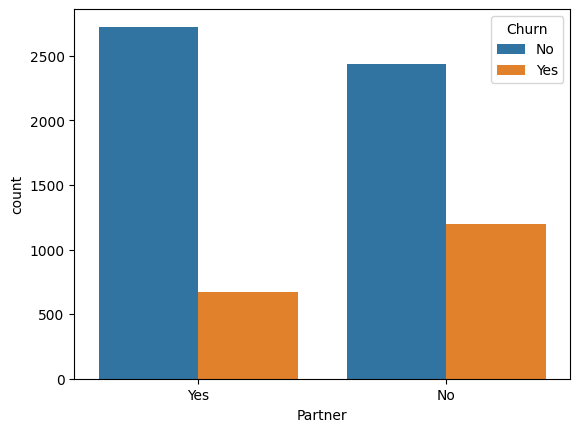

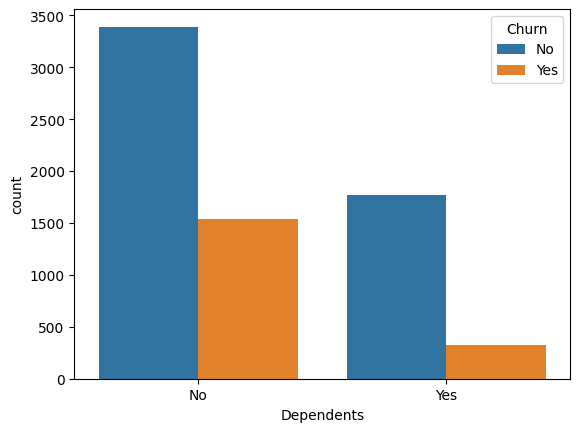

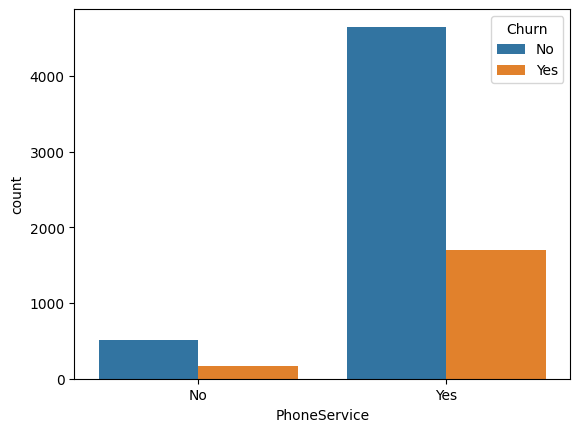

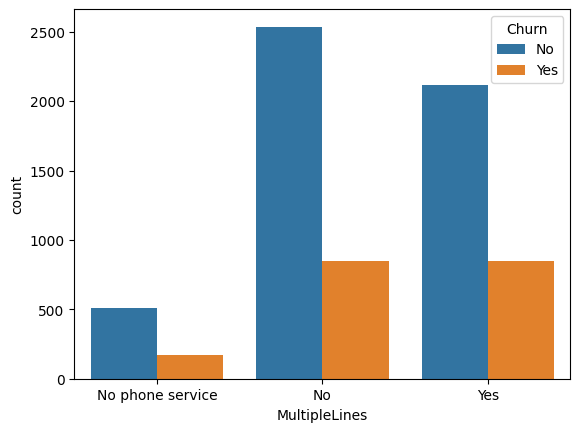

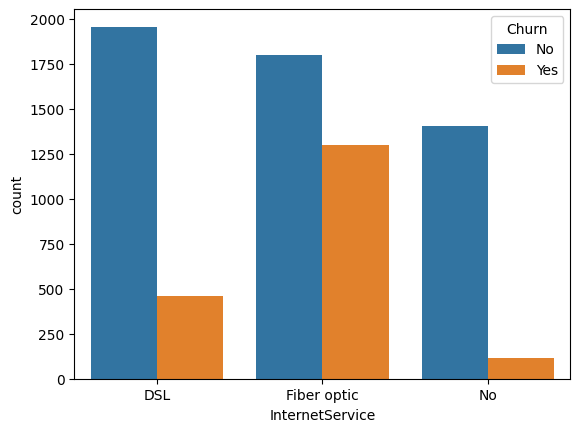

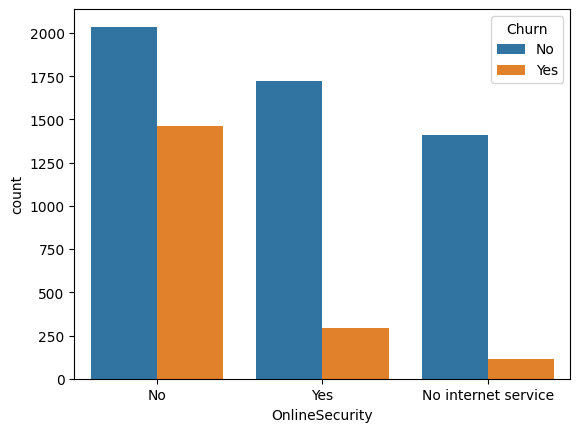

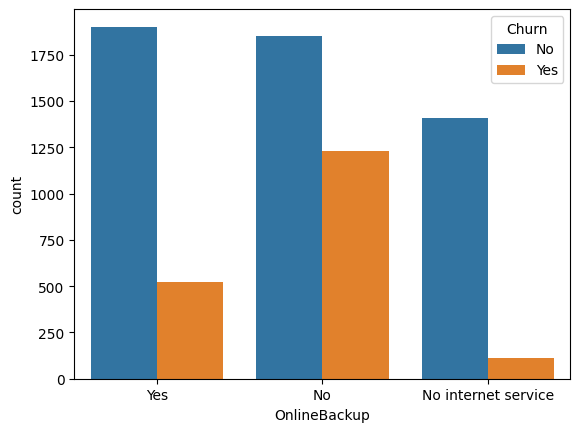

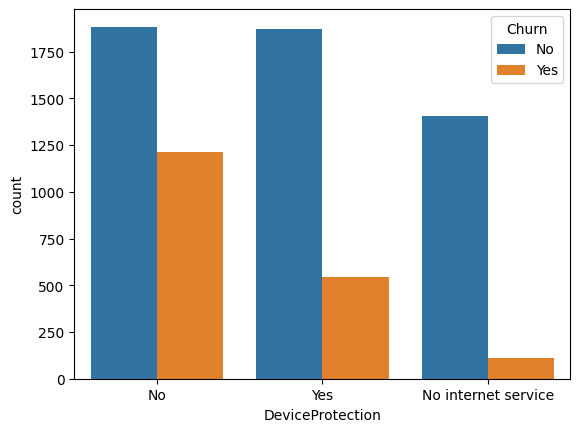

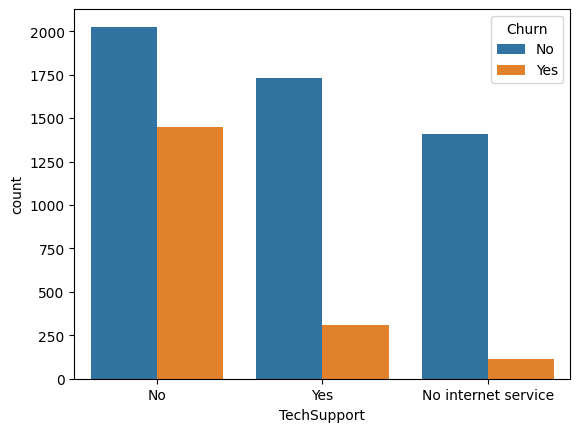

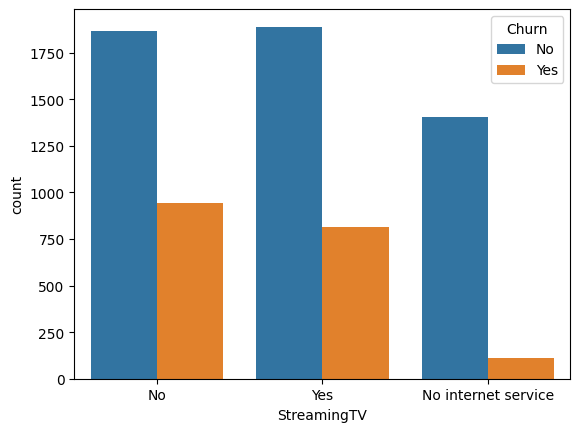

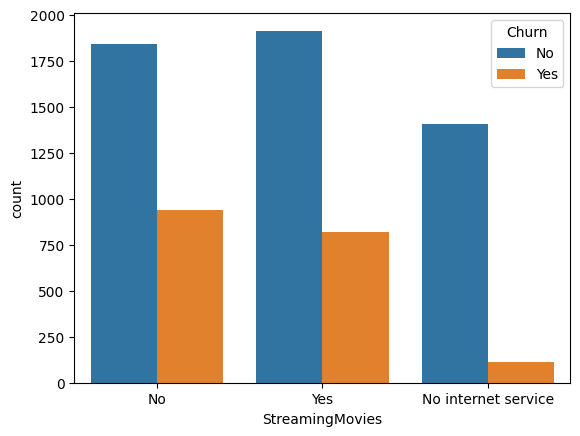

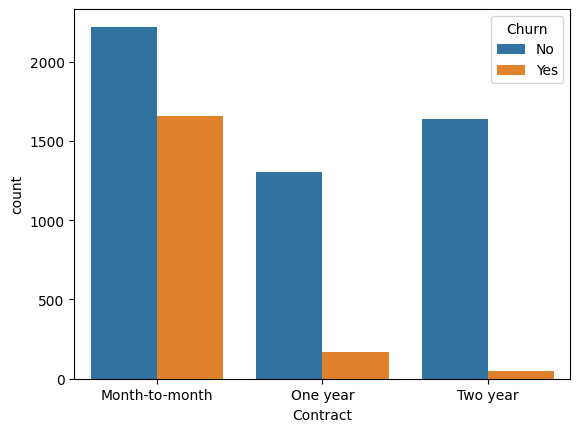

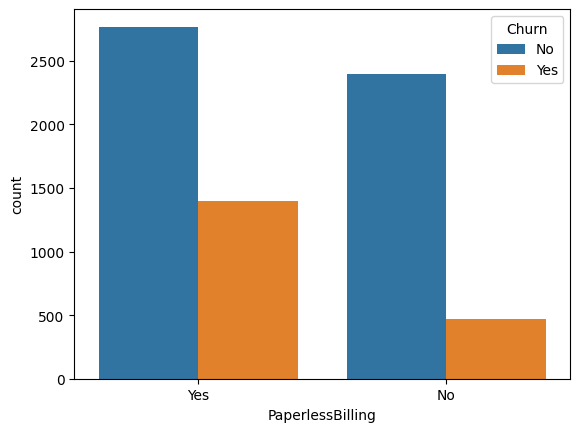

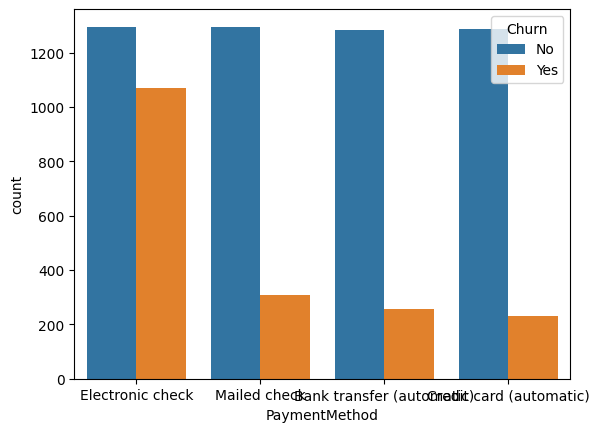

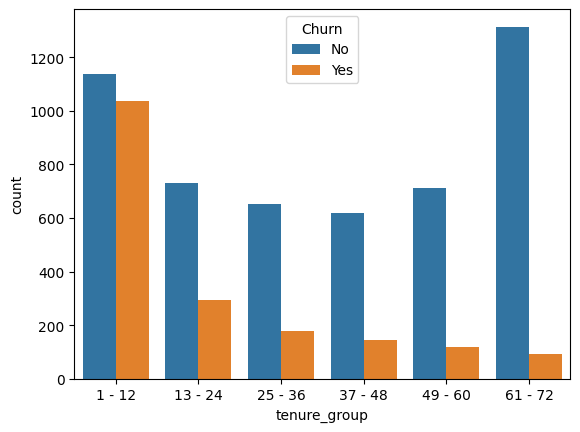

In [30]:
#Plotting distibution of individual predictors by churn
columns_to_plot = copy_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns
i = 0
for predictor in columns_to_plot:
    plt.figure(i)
    sns.countplot(data=copy_df, x=predictor, hue='Churn')
    i += 1

In [31]:
copy_df['Churn'] = np.where(copy_df.Churn == 'Yes',1,0)

In [32]:
copy_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12


In [35]:
#Converting all the categorical variables into dummy variables
df_dummies = pd.get_dummies(copy_df).astype(int)
df_dummies.head(3)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0


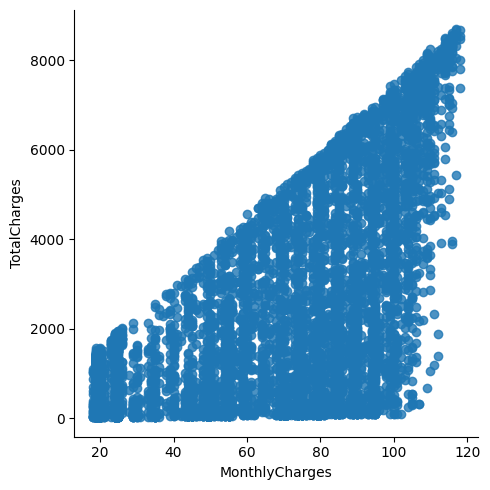

In [39]:
#Relationship between total charges and monthly charges
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=True)

##### As expected Total Charges increase as Monthly Charges increase

Text(0.5, 1.0, 'Monthly charges by churn')

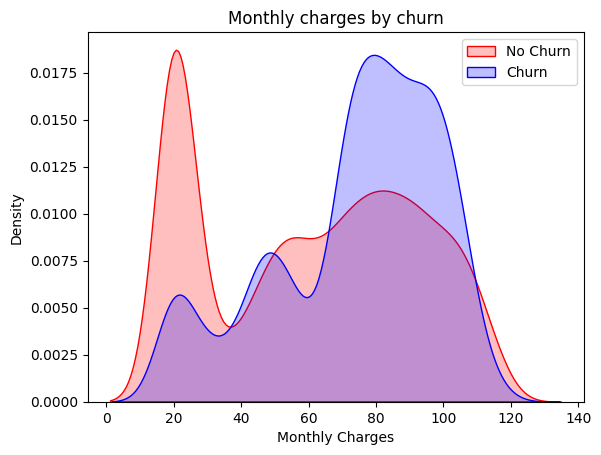

In [44]:
# Churn by monthly Charges and total Charges
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

#### **Insight**: Churn is high when Monthly Charges are high

Text(0.5, 1.0, 'Total charges by churn')

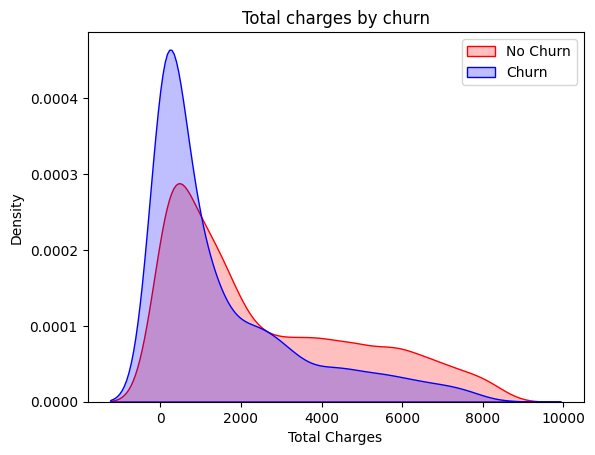

In [48]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

#### **Insight:** higher Churn at lower Total Charges

#### **Build a corelation of all predictors with churn**

<Axes: >

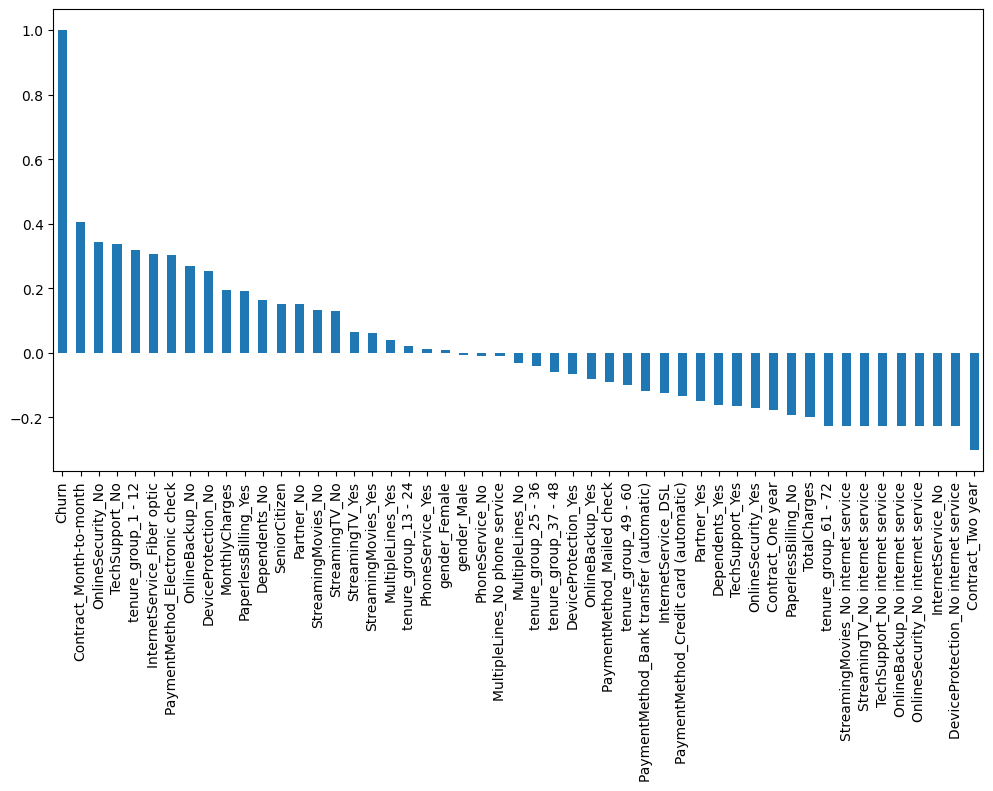

In [53]:
plt.figure(figsize=(12,6))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### **Insights**

##### **--> High Churn Cases**

###### **1)** Month to month contracts
###### **2)** No online security
###### **3)** No Tech support
###### **4)** First year of subscription 
###### **5)** Fibre Optics Internet

##### **--> Low Churn Cases**

###### **1)** Long term contracts
###### **2)** Subscriptions without internet service
###### **3)** The customers engaged for 5+ years

##### **-->** Factors like **Gender**, **Availability of PhoneService** and **no.of multiple lines** have alomost **NO** impact on **Churn**.

<Axes: >

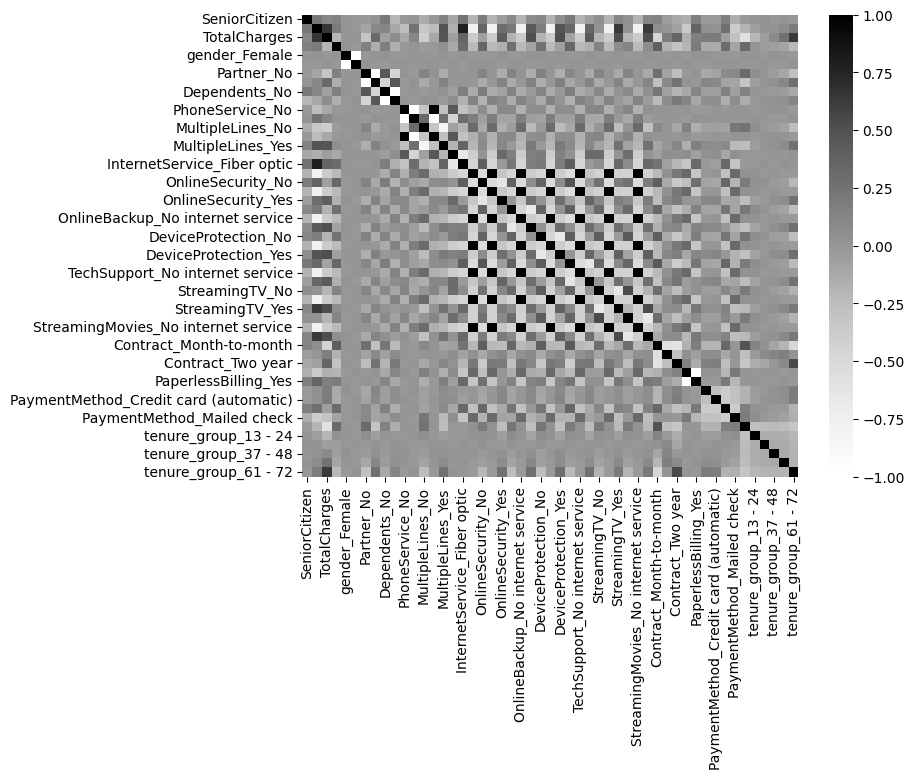

In [71]:
#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_dummies.corr(), cmap="Greys")

#### Bivariate Analysis

In [61]:
df_target0=copy_df.loc[copy_df["Churn"]==0]
df_target1=copy_df.loc[copy_df["Churn"]==1]

In [92]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 16
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 20
    
    # Calculate a more reasonable width based on the number of unique categories
    default_width = 10
    unique_count = len(df[col].unique())
    if hue:
        unique_count += 4 * len(df[hue].unique())
    
    width = min(default_width, unique_count)
    
    fig, ax = plt.subplots(figsize=(width, 8))  #  figsize 
    
    plt.xticks(rotation=45)
    
    if df[col].dtype in [float, int] and df[col].min() > 0:
        plt.yscale('log')
    
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    
    plt.title(title)
    plt.tight_layout()
    plt.show()



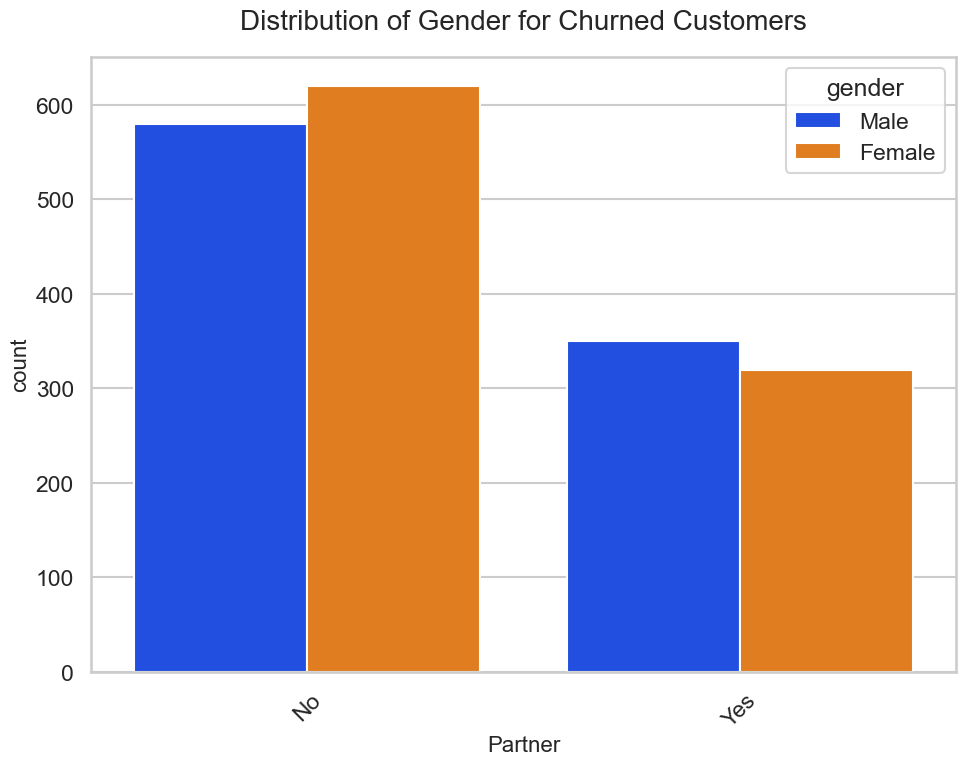

In [93]:
uniplot(df_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

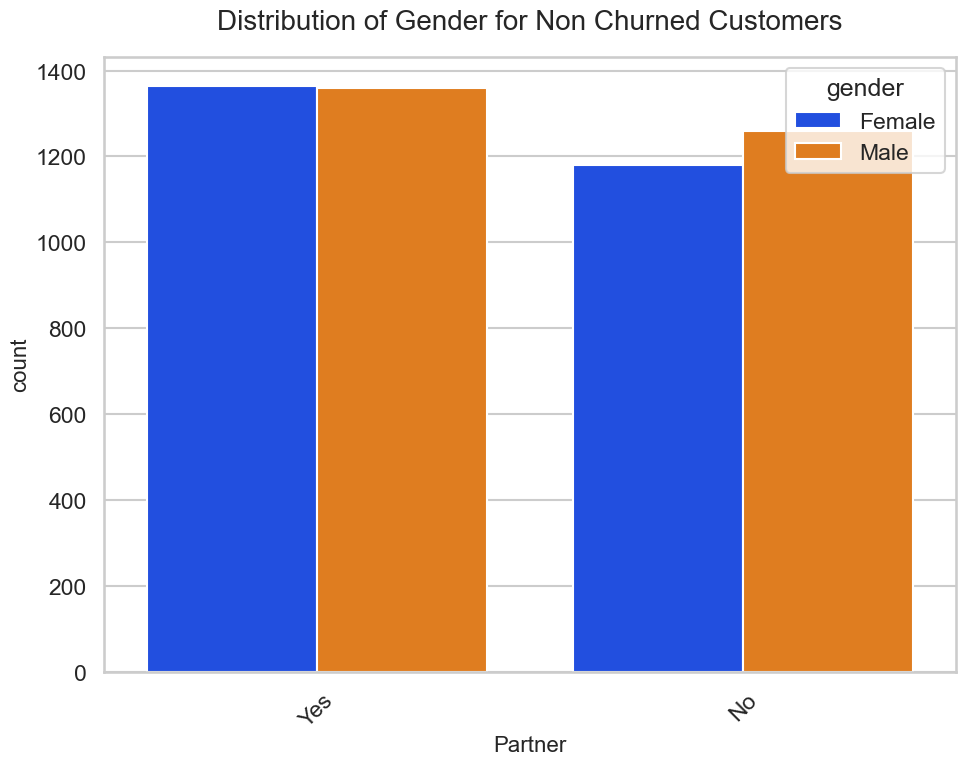

In [94]:
uniplot(df_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

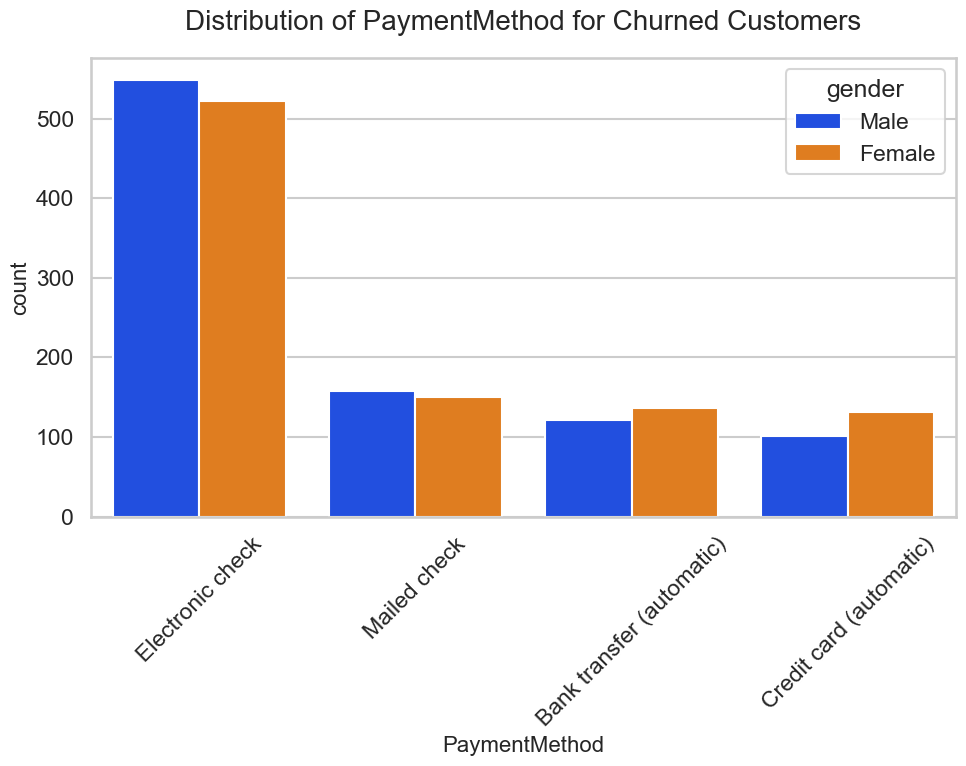

In [95]:
uniplot(df_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

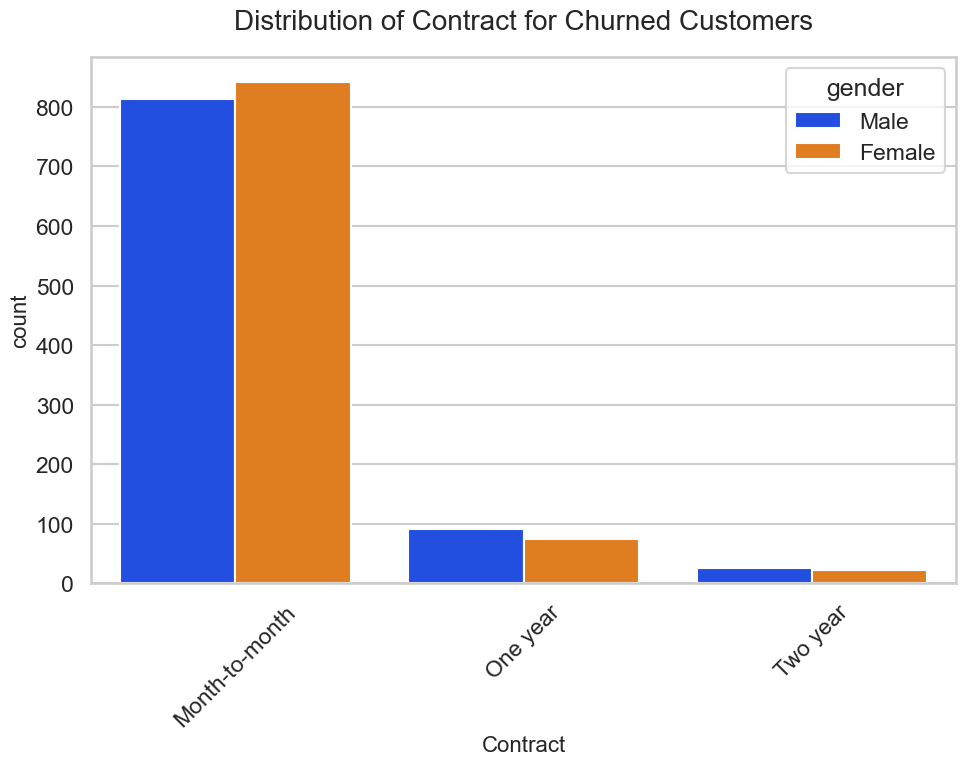

In [96]:
uniplot(df_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

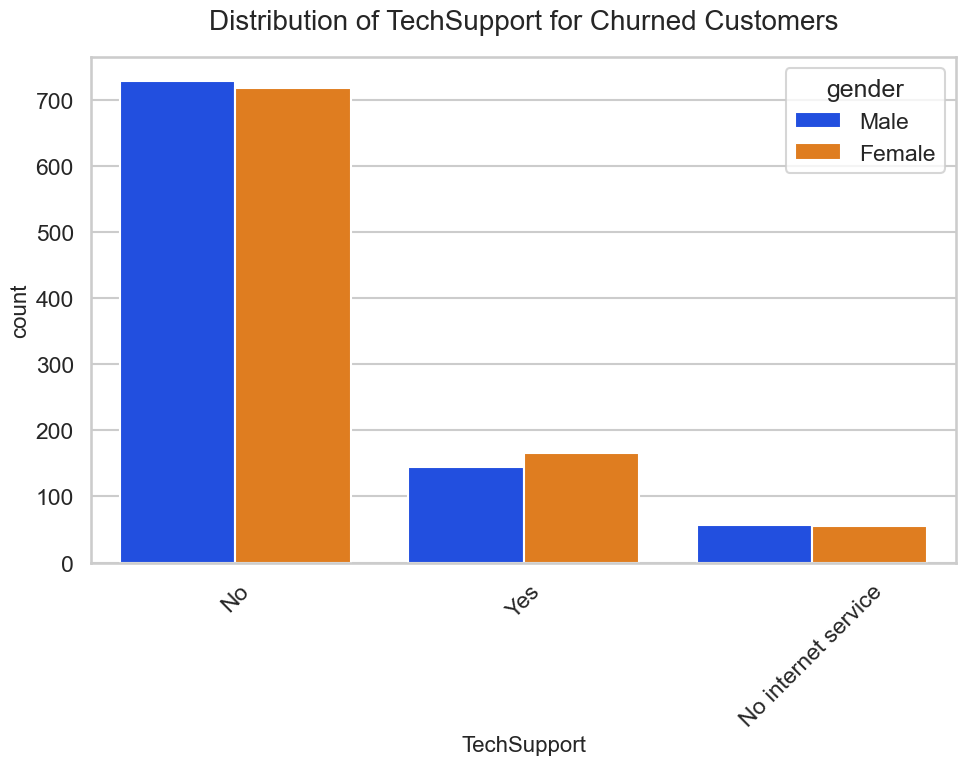

In [97]:
uniplot(df_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

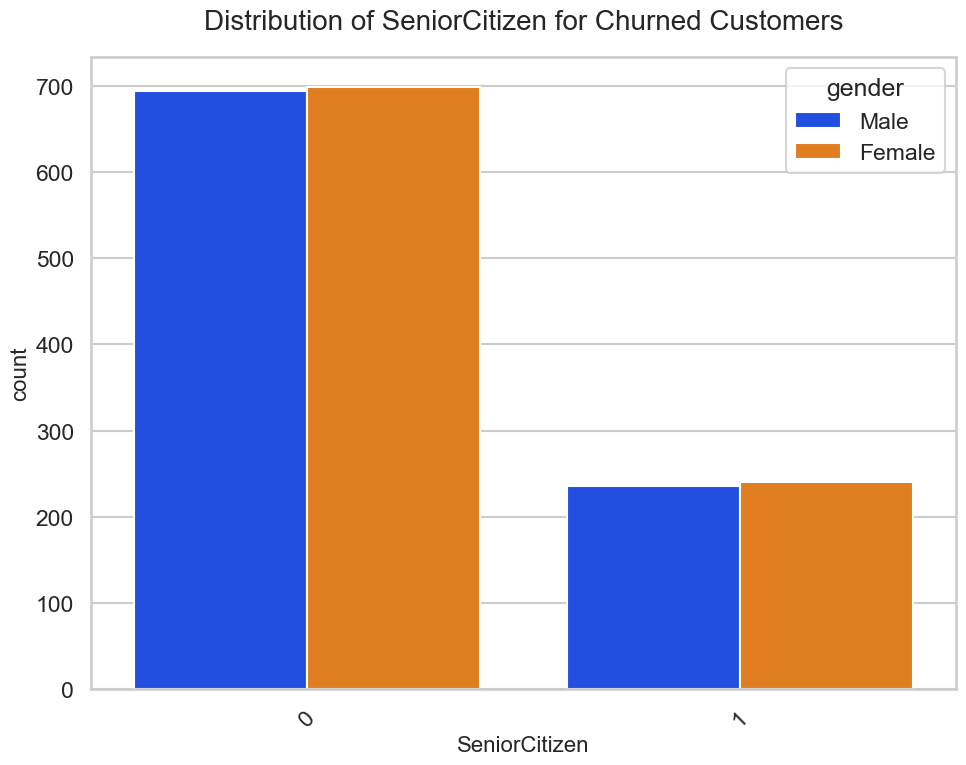

In [98]:
uniplot(df_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

### **CONCLUSION** 

###### **1)** Electronic check medium are the highest churners
###### **2)** Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
###### **3)** No Online security, No Tech Support category are high churners
###### **4)** Non senior Citizens are high churners ersers

In [100]:
df_dummies.to_csv('telco_churn_pred.csv')